In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import glob
import math
import matplotlib.pyplot as plt

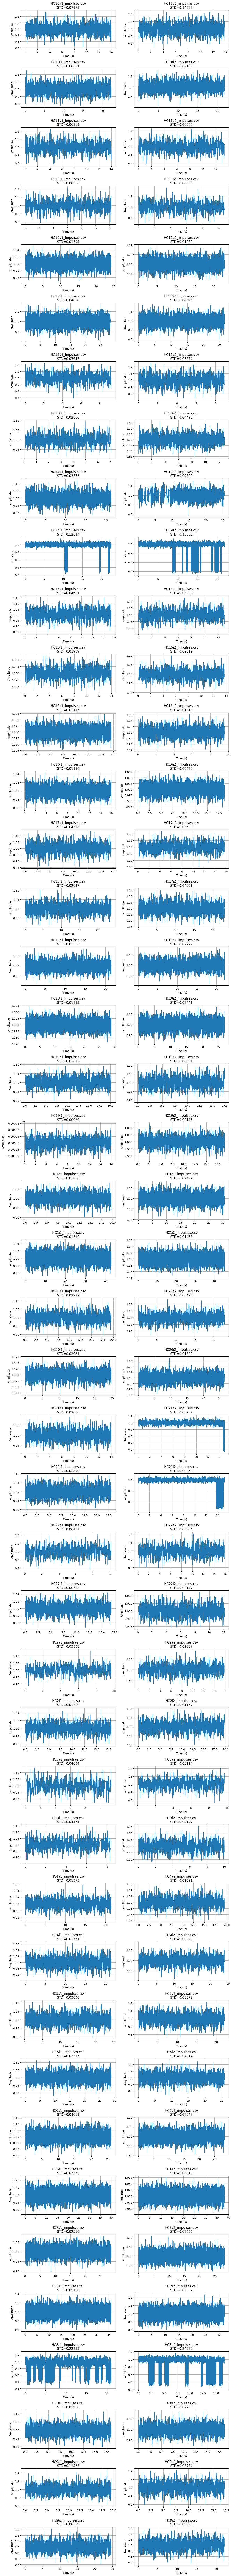

0.08957967654966532


In [3]:
# CSV 파일 경로 패턴 (예: HC***_impulses.csv)
path = r"C:/Users/user/Desktop/parkinsons/DATA/records/HC*_impulses.csv"
files = glob.glob(path)

n_files = len(files)
cols = 2  # 한 줄에 2개씩 표시
rows = math.ceil(n_files / cols)

plt.figure(figsize=(12, rows * 3))

for idx, file in enumerate(files, 1):
    df = pd.read_csv(file)
    if 'Amplitude' in df.columns and 'Time' in df.columns:
        plt.subplot(rows, cols, idx)
        plt.plot(df['Time'], df['Amplitude'])
        std_val = df['Amplitude'].std()
        plt.title(f"{os.path.basename(file)}\nSTD={std_val:.5f}")
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        plt.grid(True)

plt.tight_layout()
plt.show()
print(std_val)

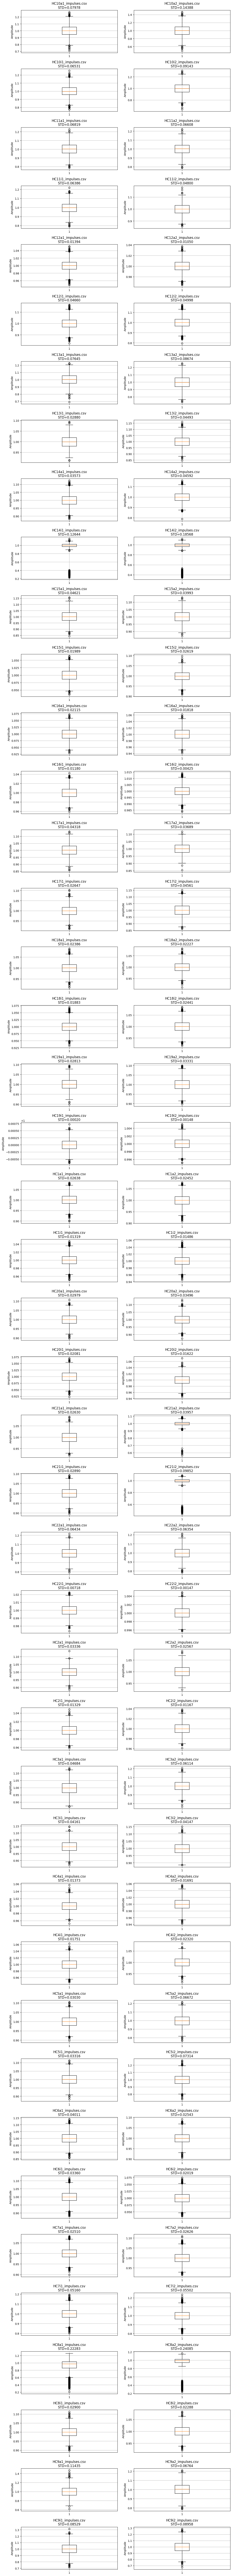

In [9]:
n_files = len(files)
cols = 2  # 한 줄에 2개씩 표시
rows = math.ceil(n_files / cols)

plt.figure(figsize=(12, rows * 3))

for idx, file in enumerate(files, 1):
    df = pd.read_csv(file)
    if 'Amplitude' in df.columns:
        plt.subplot(rows, cols, idx)
        plt.boxplot(df['Amplitude'], vert=True)
        std_val = df['Amplitude'].std()
        plt.title(f"{os.path.basename(file)}\nSTD={std_val:.5f}")
        plt.ylabel('Amplitude')
        plt.grid(True)

plt.tight_layout()
plt.show()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_14432\316517580.py:40: RuntimeWarning: Mean of empty slice
  group_means = {g: np.nanmean(arr, axis=0) for g, arr in padded_group_data.items()}


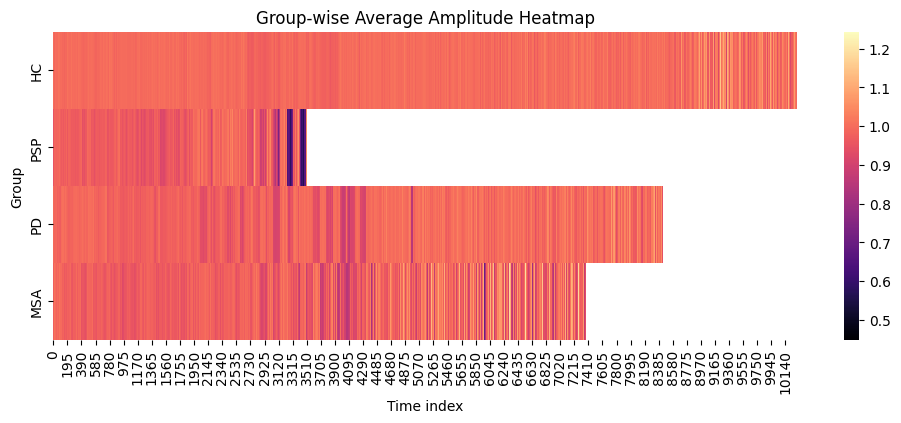

In [ ]:
import re

GROUPS = ['HC', 'PSP', 'PD', 'MSA']
group_data = {g: [] for g in GROUPS}

# CSV 읽기
data_dir = "./DATA/records"  # 경로 맞춰서 수정
for file in os.listdir(data_dir):
    if file.endswith(".csv"):
        # 예: HC10a2_impulses.csv → 'HC'
        match = re.match(r"([A-Z]+)", file)
        if match:
            group = match.group(1)
            if group in GROUPS:
                df = pd.read_csv(os.path.join(data_dir, file))
                if 'Amplitude' in df.columns:
                    group_data[group].append(df['Amplitude'].to_numpy(dtype=float))

# ===== 전역 최대 길이 찾기 =====
max_len_global = 0
for matrices in group_data.values():
    if matrices:
        max_len_global = max(max_len_global, max(len(arr) for arr in matrices))

# ===== NaN 패딩 맞추기 =====
padded_group_data = {}
for group, matrices in group_data.items():
    if not matrices:  # 데이터 없으면 NaN 배열 생성
        padded_group_data[group] = np.full((1, max_len_global), np.nan)
        continue
    padded = []
    for arr in matrices:
        arr = arr.astype(float)
        if len(arr) < max_len_global:
            arr = np.pad(arr, (0, max_len_global - len(arr)), constant_values=np.nan)
        padded.append(arr)
    padded_group_data[group] = np.array(padded)

# ===== 그룹 평균 =====
group_means = {g: np.nanmean(arr, axis=0) for g, arr in padded_group_data.items()}

# ===== Heatmap 데이터 =====
heatmap_data = np.vstack([group_means[g] for g in GROUPS])

# ===== 시각화 =====
plt.figure(figsize=(12, 4))
sns.heatmap(heatmap_data, cmap="magma", yticklabels=GROUPS)
plt.title("Group-wise Average Amplitude Heatmap")
plt.xlabel("Time index")
plt.ylabel("Group")
plt.show()


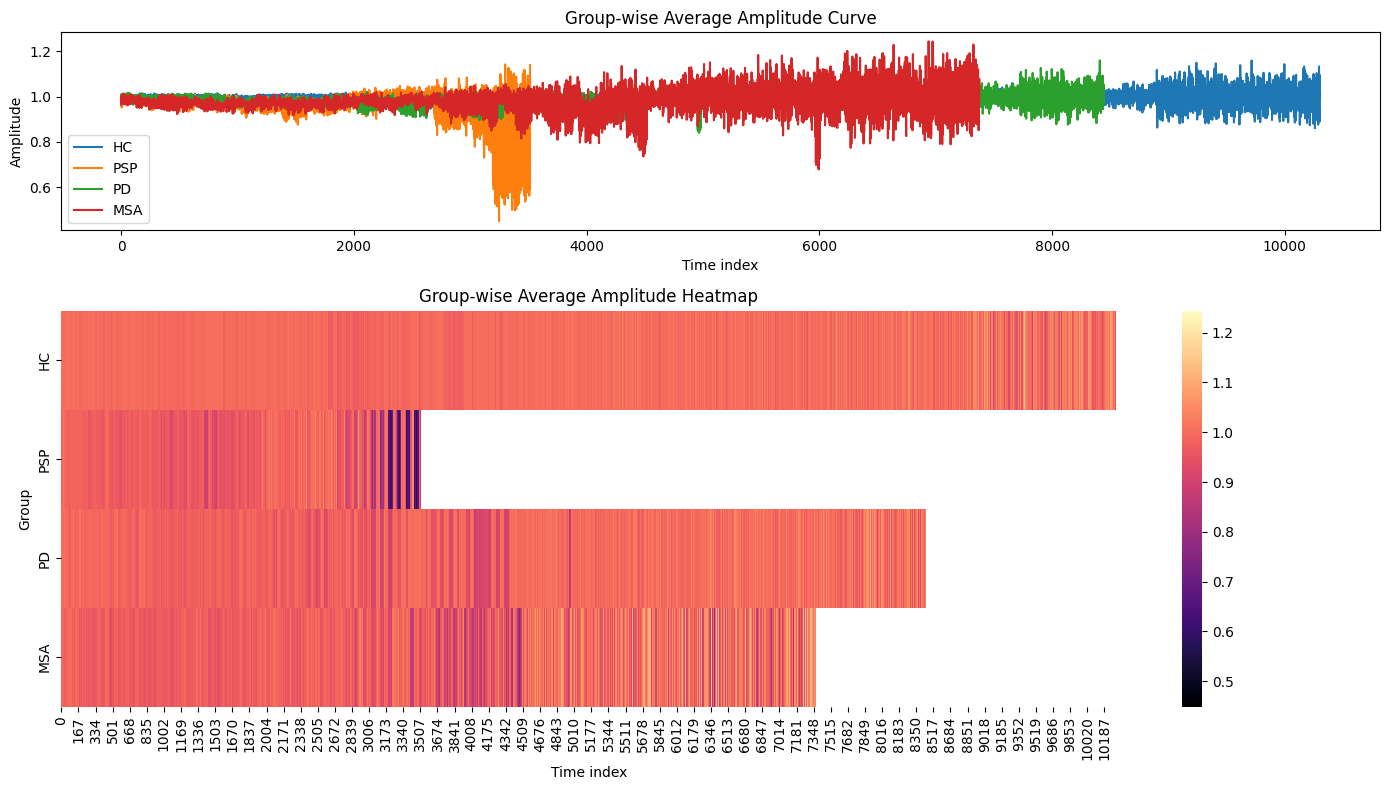

In [16]:
# ===== 시각화 (Line Plot + Heatmap) =====
fig, axes = plt.subplots(2, 1, figsize=(14, 8), gridspec_kw={'height_ratios': [1, 2]})

# 1) 그룹별 평균 곡선
for g in GROUPS:
    axes[0].plot(group_means[g], label=g)
axes[0].set_title("Group-wise Average Amplitude Curve")
axes[0].set_xlabel("Time index")
axes[0].set_ylabel("Amplitude")
axes[0].legend()

# 2) Heatmap
sns.heatmap(heatmap_data, cmap="magma", yticklabels=GROUPS, ax=axes[1])
axes[1].set_title("Group-wise Average Amplitude Heatmap")
axes[1].set_xlabel("Time index")
axes[1].set_ylabel("Group")

plt.tight_layout()
plt.show()

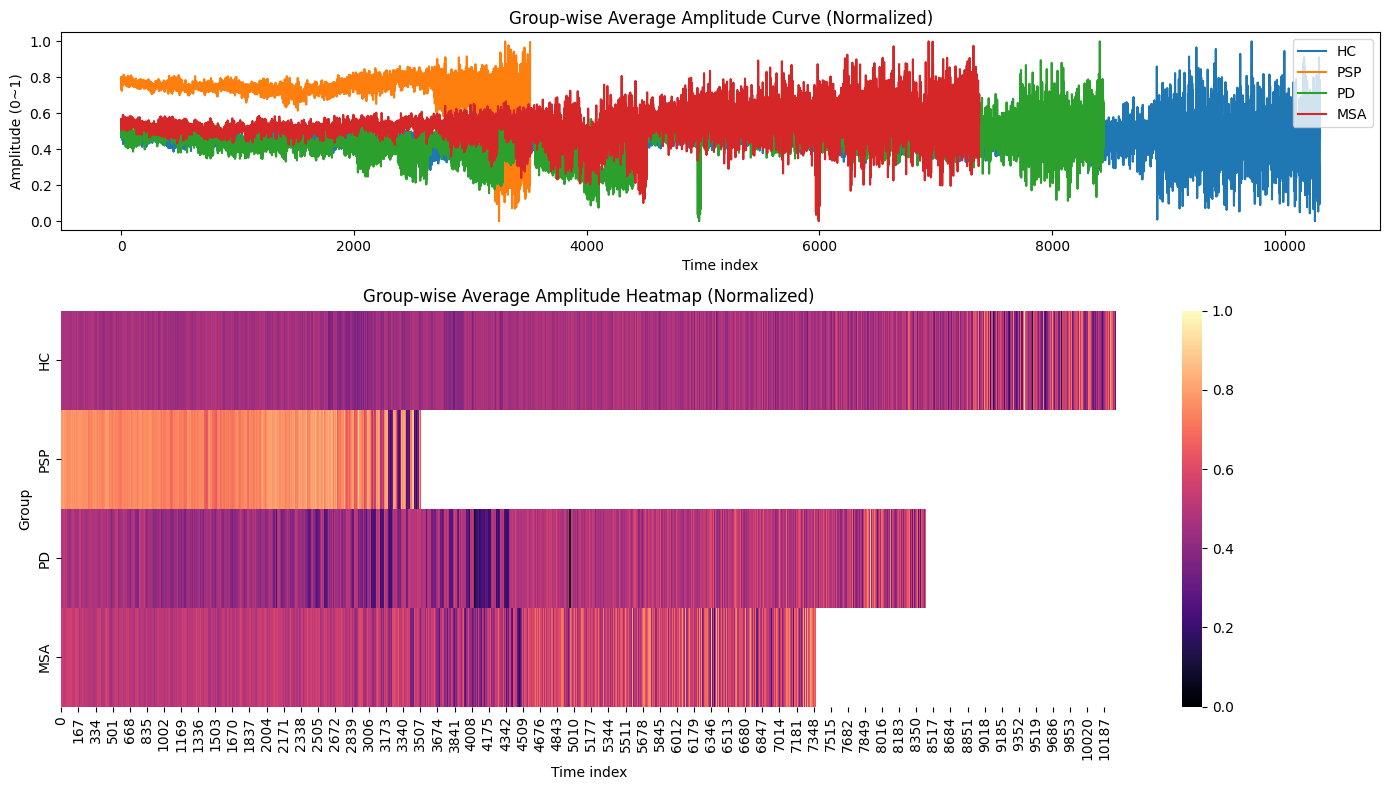

In [17]:
from sklearn.preprocessing import MinMaxScaler

# 그룹별 평균 정규화
normalized_group_means = {}
scaler = MinMaxScaler()

for g in GROUPS:
    data = group_means[g].reshape(-1, 1)  # 2D로 변환
    normalized_group_means[g] = scaler.fit_transform(data).flatten()

# Heatmap 데이터 (정규화된 값으로)
heatmap_data_norm = np.vstack([normalized_group_means[g] for g in GROUPS])

# ===== 시각화 =====
fig, axes = plt.subplots(2, 1, figsize=(14, 8), gridspec_kw={'height_ratios': [1, 2]})

# 1) 정규화된 평균 곡선
for g in GROUPS:
    axes[0].plot(normalized_group_means[g], label=g)
axes[0].set_title("Group-wise Average Amplitude Curve (Normalized)")
axes[0].set_xlabel("Time index")
axes[0].set_ylabel("Amplitude (0~1)")
axes[0].legend()

# 2) 정규화 Heatmap
sns.heatmap(heatmap_data_norm, cmap="magma", yticklabels=GROUPS, ax=axes[1])
axes[1].set_title("Group-wise Average Amplitude Heatmap (Normalized)")
axes[1].set_xlabel("Time index")
axes[1].set_ylabel("Group")

plt.tight_layout()
plt.show()


In [19]:
test_df = pd.read_csv("C:/Users/user/Desktop/parkinsons/DATA/records/HC1a2_impulses.csv")

test_df.columns

Index(['Time', 'Amplitude'], dtype='object')

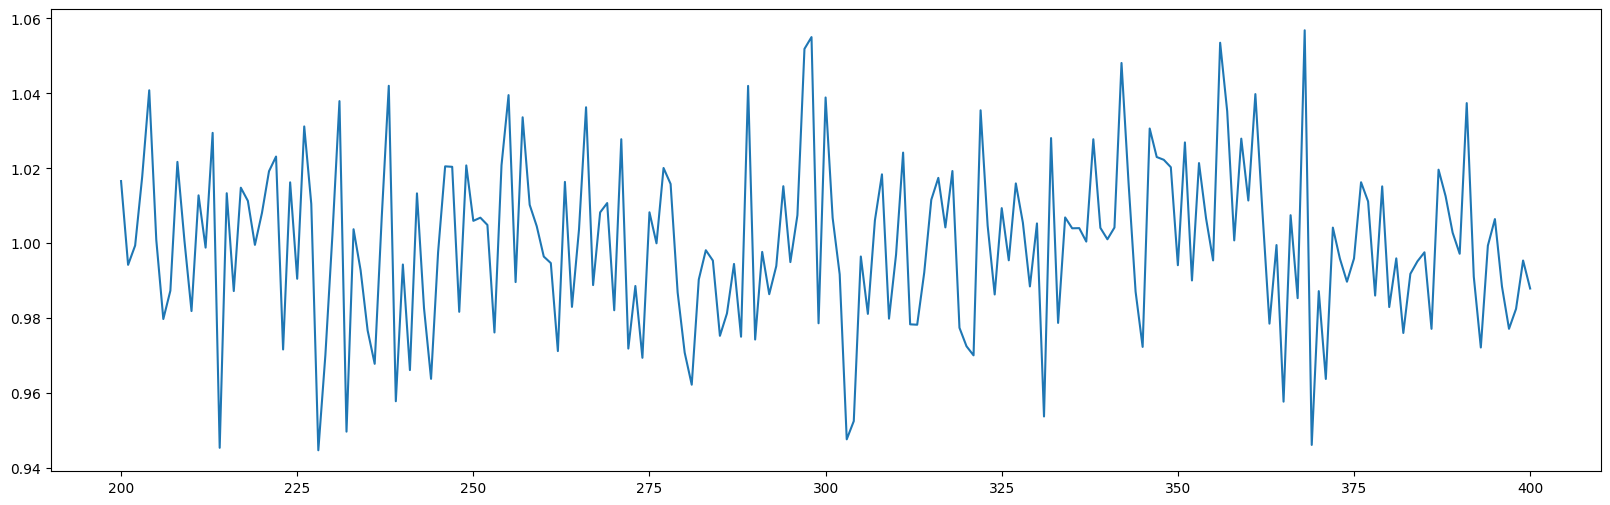

In [32]:
plt.figure(figsize=(20, 6))
plt.plot(test_df.loc[200:400]['Amplitude'])

plt.show()

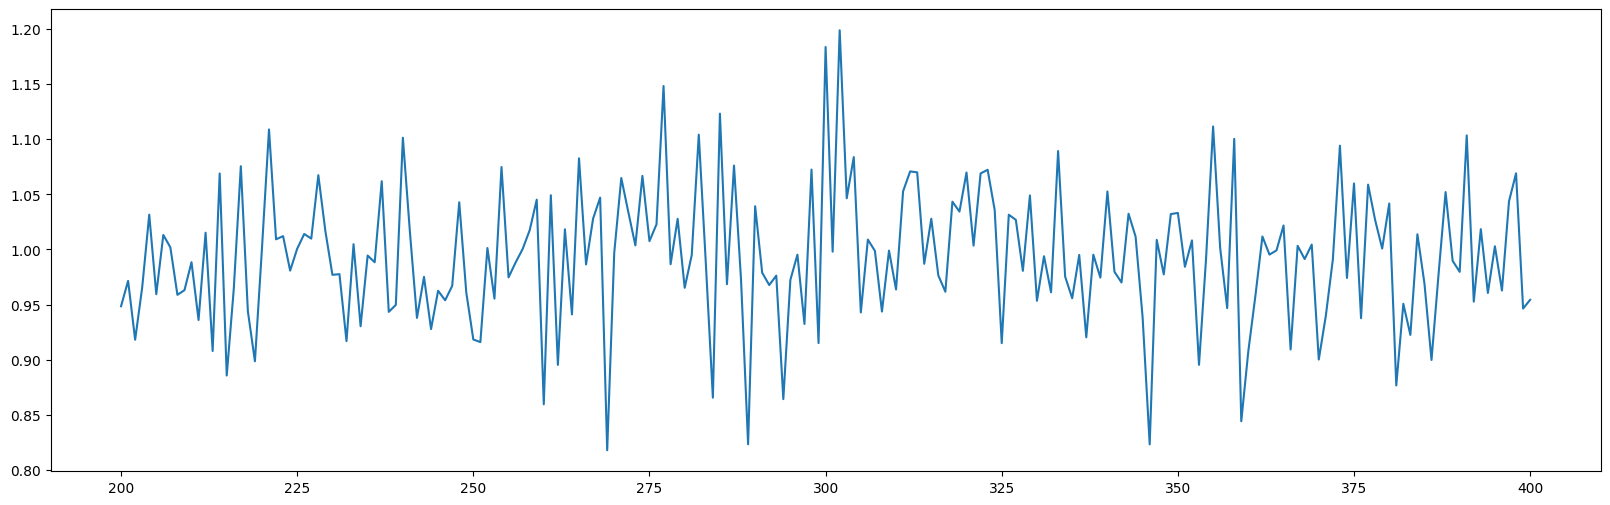

In [33]:
psp_df = pd.read_csv("C:/Users/user/Desktop/parkinsons/DATA/records/PSP18a2_impulses.csv")

plt.figure(figsize=(20, 6))
plt.plot(psp_df.loc[200:400]['Amplitude'])

plt.show()

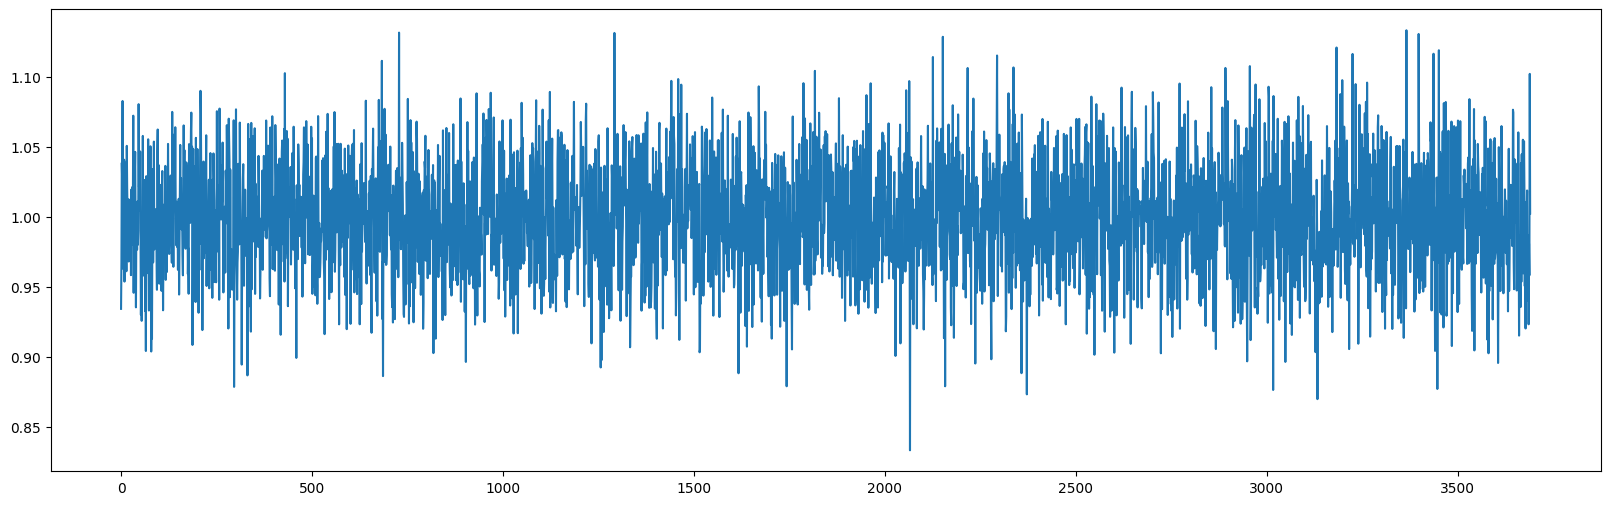

In [40]:
msa_df = pd.read_csv("C:/Users/user/Desktop/parkinsons/DATA/records/MSA15a1_impulses.csv")

plt.figure(figsize=(20, 6))
plt.plot(msa_df['Amplitude'])

plt.show()

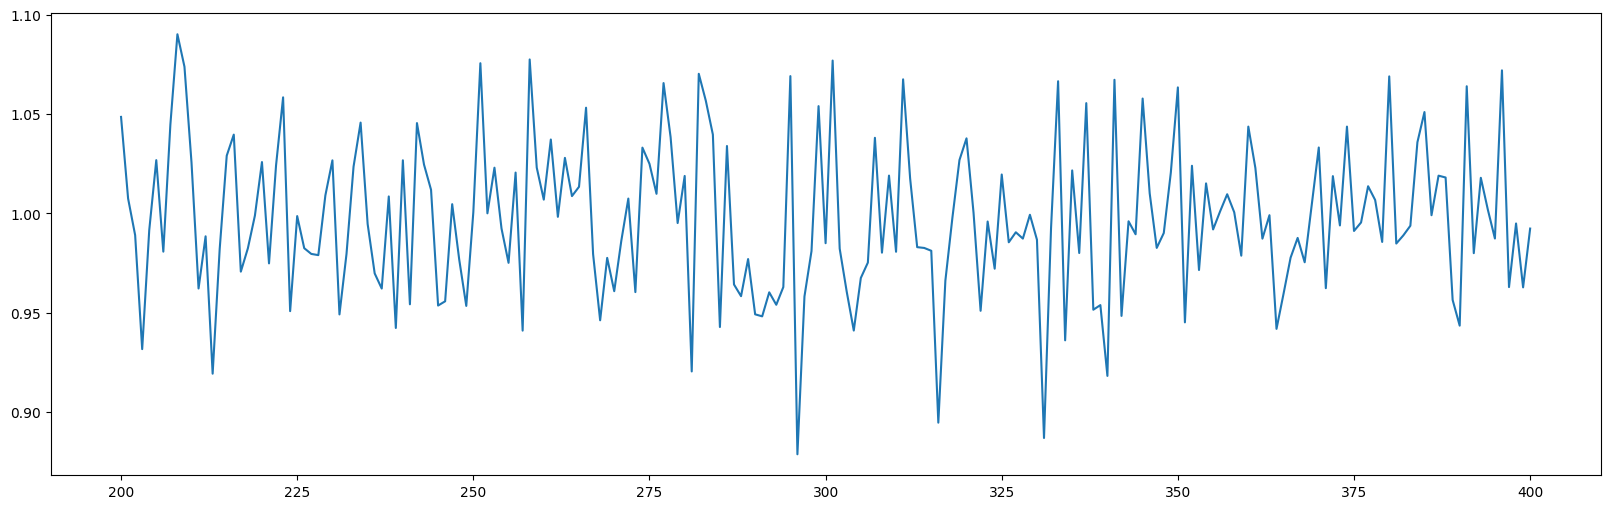

In [41]:
msa_df = pd.read_csv("C:/Users/user/Desktop/parkinsons/DATA/records/MSA15a1_impulses.csv")

plt.figure(figsize=(20, 6))
plt.plot(msa_df.loc[200:400]['Amplitude'])

plt.show()